In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
test_answer_accs = np.load("../data/MATH_aug/test_answer_types5.npy")==0


In [20]:
accs_epoch = []
for epoch in [2, 5, 10]:
    accs = (np.load(f"../ckpts/math_aug_easy0.00_medium0.00_hard1.00_total5000_{str(epoch)}epochs/test_answer_types5_seed2.npy")==0).mean(axis=-1)
    
    
    accs_detailed = []
    
    for num_train_correct in range(6):
        subsample_idxs = np.where(test_answer_accs.sum(axis=-1)==num_train_correct)[0]
        accs_detailed.append(accs[subsample_idxs].mean())
    accs_epoch.append(accs_detailed)


accs_epoch = np.array(accs_epoch)


In [11]:
accs_epoch

array([[0.02659123, 0.07118644, 0.11397849, 0.1511811 , 0.2       ,
        0.37745536],
       [0.03243753, 0.0816641 , 0.15397849, 0.21469816, 0.31188525,
        0.49821429],
       [0.02923149, 0.09399076, 0.17677419, 0.22624672, 0.2954918 ,
        0.50915179]])

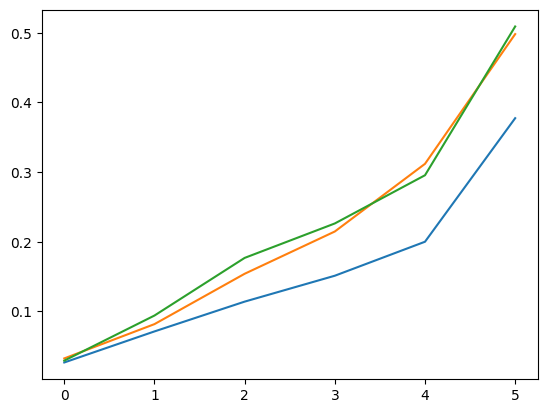

In [18]:
accs_epoch2 = []
for epoch in [2, 5, 10]:
    accs = (np.load(f"../ckpts/math_aug_easy0.23_medium0.43_hard0.34_total5000_{str(epoch)}epochs/test_answer_types5_seed2.npy")==0).mean(axis=-1)
    
    
    accs_detailed = []
    
    for num_train_correct in range(6):
        subsample_idxs = np.where(test_answer_accs.sum(axis=-1)==num_train_correct)[0]
        accs_detailed.append(accs[subsample_idxs].mean())
    accs_epoch2.append(accs_detailed)


accs_epoch2 = np.array(accs_epoch)

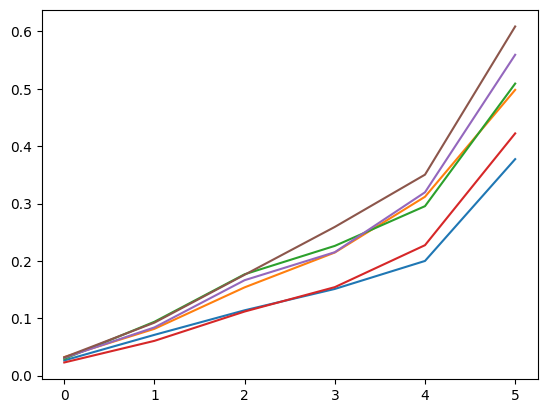

In [21]:
for accs in accs_epoch:
    plt.plot(accs)

for accs in accs_epoch2:
    plt.plot(accs)

In [23]:
accs_epoch.shape

(3, 6)

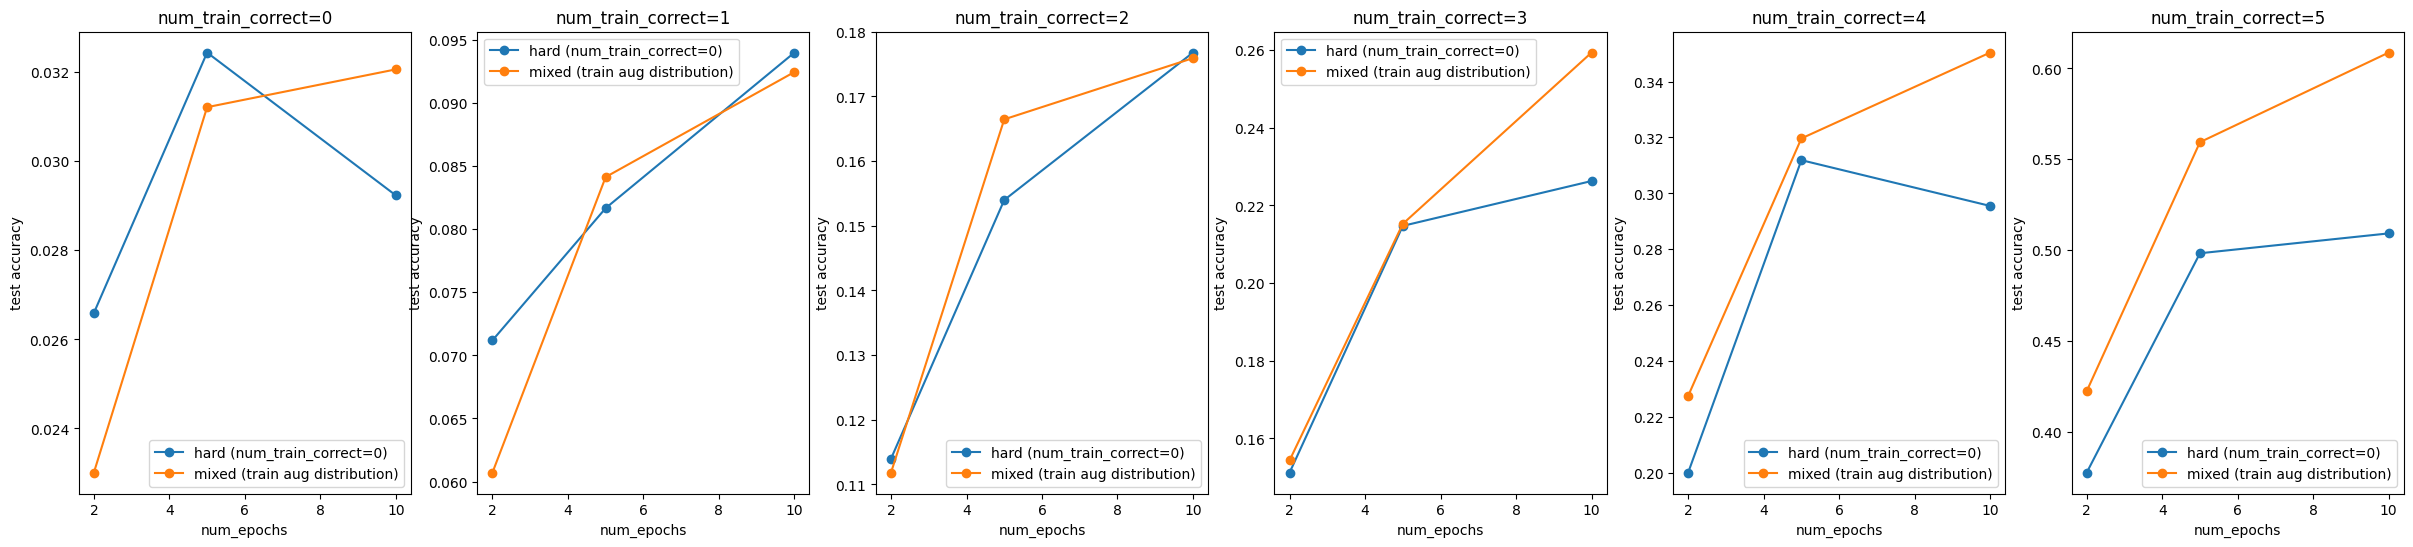

In [31]:
# make 6 subplots

fig, axs = plt.subplots(1, 6, figsize=(30, 6))


for i in range(6):
    axs[i].plot([2, 5, 10], accs_epoch[:, i], "o-", label = "hard (num_train_correct=0)")
    axs[i].plot([2, 5, 10], accs_epoch2[:, i], "o-", label = "mixed (train aug distribution)")
    axs[i].legend()
    axs[i].set_title(f"num_train_correct={i}")
    axs[i].set_xlabel("num_epochs")
    axs[i].set_ylabel("test accuracy")


